# Setup

In [276]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
output_dir = 'output/'
df_path = output_dir + '/analysis_sample.csv'

## Load in Dataset

In [217]:
df = pd.read_csv(df_path)

In [4]:
df.describe()

,CIK,ret_t-t2,ret_t3-t10,unique_word_count,word_count,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,...,mb,prof_a,ppe_a,cash_a,xrd_a,dltt_a,invopps_FG09,sales_g,dv_a,short_debt
count,5.030000e+02,497.000000,497.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,334.000000,356.000000,357.000000,357.000000
mean,7.940509e+05,1.581724,-0.817852,5425.424000,69504.586000,0.038030,0.039918,0.036081,0.014795,0.000033,...,3.546048,0.156999,0.242947,0.131160,0.027923,0.318914,3.212256,0.275366,0.024358,0.093187
std,5.545629e+05,0.737685,0.241288,1177.831997,28943.930805,0.004226,0.005064,0.004679,0.002147,0.000060,...,2.855027,0.085628,0.210704,0.120123,0.043900,0.184323,2.900098,0.797920,0.028084,0.090662
min,1.800000e+03,-0.063537,-0.994100,460.000000,1575.000000,0.015659,0.010931,0.023693,0.004394,0.000000,...,0.878375,-0.099432,0.013654,0.003713,0.000000,0.002061,0.481436,-0.658981,0.000000,0.000000
25%,9.761050e+04,1.129611,-0.983146,4767.250000,51384.750000,0.035457,0.036979,0.033086,0.013601,0.000000,...,1.654851,0.099774,0.092956,0.043998,0.000000,0.198202,1.348717,0.084244,0.000000,0.026839
50%,8.848870e+05,1.617573,-0.932703,5324.500000,64916.500000,0.038217,0.039824,0.035853,0.014822,0.000017,...,2.564147,0.143156,0.162122,0.097921,0.008220,0.301803,2.193423,0.157469,0.017502,0.064984
75%,1.137954e+06,2.065138,-0.745948,5893.500000,80526.000000,0.040611,0.043145,0.038983,0.016067,0.000042,...,4.330079,0.202071,0.340033,0.171472,0.039480,0.406943,3.917630,0.281948,0.037184,0.124854
max,1.932393e+06,3.547896,0.067236,10469.000000,271760.000000,0.051376,0.056662,0.055229,0.021395,0.000945,...,14.733148,0.405925,0.888302,0.607837,0.295576,1.019505,14.066011,14.183099,0.164573,0.530059


In [5]:
# TODO: explore word count and unique word count

In [43]:
df_longer = df.drop(['CIK','Security','filing_date','ret_t-t2','ret_t3-t10'], axis=1) \
        .melt(id_vars=['Symbol','word_count','unique_word_count'], var_name='sentiment', value_name='score')
df_longer

,Symbol,word_count,unique_word_count,sentiment,score
0,MMM,76432.0,6384.0,bhr_negative,0.044314
1,AOS,33810.0,3801.0,bhr_negative,0.032919
2,ABT,52061.0,5045.0,bhr_negative,0.039492
3,ABBV,61560.0,5886.0,bhr_negative,0.035185
4,ACN,51953.0,5169.0,bhr_negative,0.034127
...,...,...,...,...,...
5025,FRC,NaN,NaN,bio_positive,NaN
5026,GEHC,NaN,NaN,bio_positive,NaN
5027,SBNY,NaN,NaN,bio_positive,NaN
5028,WBD,NaN,NaN,bio_positive,NaN


In [15]:
# # # correlation matrix
# # corr = df.drop(['CIK','word_count','unique_word_count'], axis=1).corr(numeric_only=True)[['ret_t-t2','ret_t3-t10']]
# # # corr.filter(regex='^[^ret]*')
# # corr
# df

,Symbol,Security,CIK,filing_date,ret_t-t2,ret_t3-t10,truth_path,unique_word_count,word_count,bhr_negative,...,mb,prof_a,ppe_a,cash_a,xrd_a,dltt_a,invopps_FG09,sales_g,dv_a,short_debt
0,MMM,3M,66740,2022-02-09,-0.017671,-0.090256,MMM,6384.0,76433.0,0.044313,...,2.838265,0.197931,0.218538,0.101228,0.042361,0.355625,2.564301,0.098527,0.072655,0.086095
1,AOS,A. O. Smith,91142,2022-02-11,-0.014543,-0.138970,AOS,3801.0,33811.0,0.032918,...,4.368153,0.197847,0.183974,0.181729,0.027113,0.061075,NaN,0.222291,0.048958,0.080191
2,ABT,Abbott,1800,2022-02-18,-0.041758,-0.127147,ABT,5047.0,52066.0,0.039488,...,3.825614,0.166285,0.134475,0.136297,0.036465,0.242726,3.559664,0.244654,0.042582,0.051893
3,ABBV,AbbVie,1551152,2022-02-18,-0.029927,-0.111148,ABBV,5890.0,61568.0,0.035181,...,2.528878,0.194433,0.040074,0.067086,0.054911,0.442929,2.144449,0.227438,0.063203,0.163364
4,ACN,Accenture,1467373,2022-10-12,-0.026583,-0.015658,ACN,5171.0,51961.0,0.034122,...,5.474851,0.195625,0.111674,0.189283,0.025902,0.063702,5.023477,0.140013,0.051790,0.215661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,BF.B,Brown–Forman,14693,NaN,NaN,NaN,0000014693,4815.0,44204.0,0.036897,...,5.639590,0.210576,0.148909,0.137141,0.000000,0.325279,5.401004,0.136377,0.130394,0.115614
499,FRC,First Republic Bank,1132979,NaN,NaN,NaN,0001132979,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,GEHC,GE HealthCare,1932393,NaN,NaN,NaN,0001932393,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,SBNY,Signature Bank,1288784,NaN,NaN,NaN,0001288784,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Results

- [x] Make a table with the correlation of each (10) sentiment measure against both (2) return measures. (So: an 10x2 table.) The return measures are the firm’s returns around the 10-K release. We have 2 versions of this measure because we will try two different windows of time around the 10-K. You will make 5 sentiment measures, and each has a positive and negative component. Thus: 10 sentiment measures. See step 6 for more details about the sentiment and return measures.
- [ ] Include a scatterplot (or similar) of each sentiment measure against both return measures. Better: Combining this into a single figure Better: Skip the correlation table and include the numerical correlations on the figure Better: Regress (Don’t worry about printing these regressions out “pretty”, just try them if you want!)
- [ ] Four discussion topics:
  - [ ] On (1), (2), and (3) below: Focus just on the first return variable (which will examine returns around the 10-K publication)
  - [ ] On (4) below: Focus on how the “ML sentiment” variables (positive and negative) are related to the two different return measures.
    1. [ ] Compare / contrast the relationship between the returns variable and the two “LM Sentiment” variables (positive and negative) with the relationship between the returns variable and the two “ML Sentiment” variables (positive and negative). Focus on the patterns of the signs of the relationships and the magnitudes.
    1. [ ] If your comparison/contrast conflicts with Table 3 of the Garcia, Hu, and Rohrer paper (ML_JFE.pdf, in the repo), discuss and brainstorm possible reasons why you think the results may differ. If your patterns agree, discuss why you think they bothered to include so many more firms and years and additional controls in their study? (It was more work than we did on this midterm, so why do it to get to the same point?)
    1. [ ] Discuss your 3 “contextual” sentiment measures. Do they have a relationship with returns that looks “different enough” from zero to investigate further? If so, make an economic argument for why sentiment in that context can be value relevant.
    1. [ ] Is there a difference in the sign and magnitude? Speculate on why or why not.

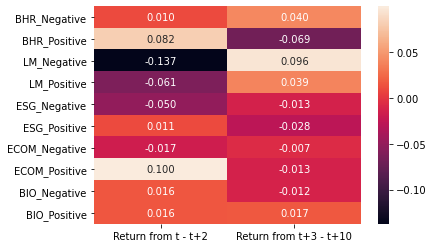

In [60]:
# Correlation matrix
corr = df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$', axis=1).corr() \
        .filter(regex='^.*_(posi|nega)tive$', axis=0)[['ret_t-t2', 'ret_t3-t10']]
sns.heatmap(corr,
        xticklabels=['Return from t - t+2', 'Return from t+3 - t+10'],    # corr.columns# TODO: change names to be more friendly
        yticklabels=corr.index.map(lambda s: re.sub(r'([a-z]+_[a-z])', lambda x: f'{x[1].upper()}', s)), #.map(lambda x: re.sub('_', ' ', x)),
        annot=True,
        fmt='.03f');

<AxesSubplot:xlabel='ret_t-t2', ylabel='bhr_negative'>

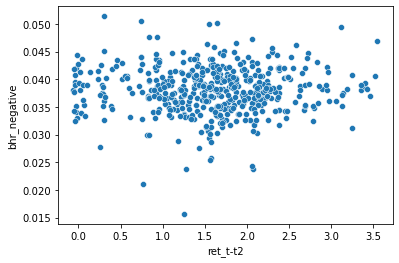

In [66]:
# # Scatterplot
# # df_longer = df.drop(['CIK','Security','filing_date','ret_t-t2','ret_t3-t10'], axis=1) \
# #         .melt(id_vars=['Symbol','word_count','unique_word_count'], var_name='sentiment', value_name='score')
# # df_longer

# df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$', axis=1)

# sns.scatterplot(x=df['ret_t-t2'], y=df['bhr_negative'])

In [120]:
kept_cols = df.filter(regex='^.*_(posi|nega)tive$', axis=1).columns
df_longer_rets = df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$', axis=1) \
        .melt(id_vars = kept_cols, var_name='Return Type', value_name='Return')

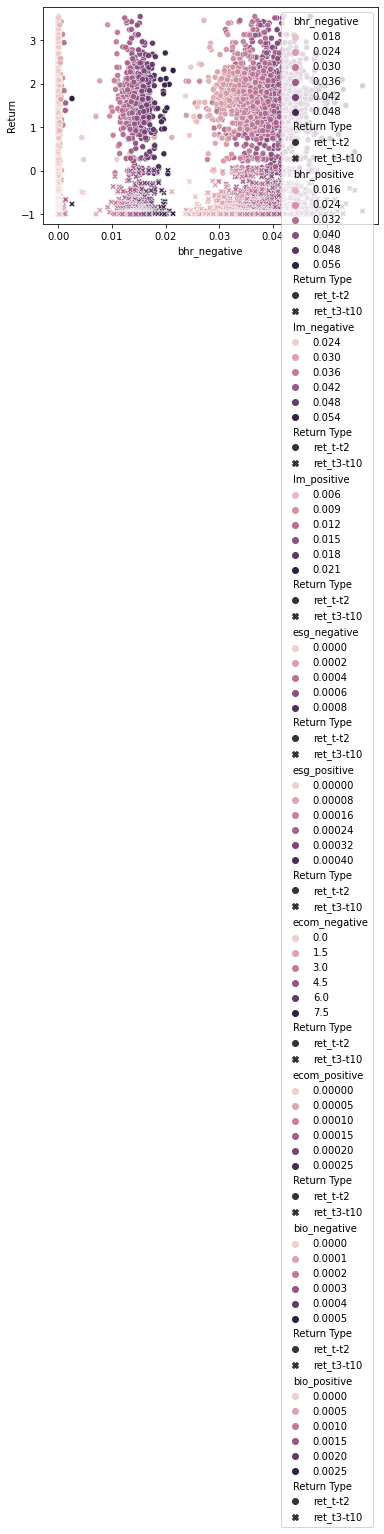

In [121]:
for col in kept_cols:
    sns.scatterplot(data=df_longer_rets, x=col, y='Return', hue=col, style='Return Type');

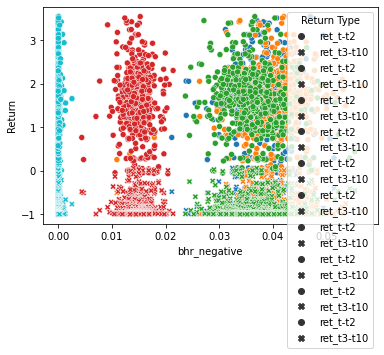

In [122]:
for col in kept_cols:
    sns.scatterplot(data=df_longer_rets, x=col, y='Return', style='Return Type');

In [125]:
df.filter(regex='^.*_(posi|nega)tive$|^ret_t.8$', axis=1)

,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,ecom_negative,ecom_positive,bio_negative,bio_positive
0,0.044313,0.041749,0.043097,0.015124,0.000000,0.000013,0.000000,0.000000,0.000052,0.000118
1,0.032918,0.038390,0.034101,0.013161,0.000030,0.000000,0.000000,0.000000,0.000000,0.000089
2,0.039488,0.039757,0.036242,0.010583,0.000019,0.000000,0.000000,0.000038,0.000115,0.000365
3,0.035181,0.034953,0.035814,0.014764,0.000016,0.000016,0.000000,0.000016,0.000065,0.000276
4,0.034122,0.046747,0.036431,0.018437,0.000000,0.000058,0.000019,0.000038,0.000000,0.000058
...,...,...,...,...,...,...,...,...,...,...
498,0.036897,0.044091,0.033526,0.017170,0.000023,0.000023,0.000023,0.000000,0.000068,0.000204
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Q10
# ind_retech = retech_tot_grouped.reset_index()

# # Replace gsectors with their names
# values = {
#         15: 'Materials',                 # 15
#         20: 'Industrials',               # 20
#         25: 'Consumer Discretionary',    # 25
#         35: 'Health Care',               # 35
#         40: 'Financials',                # 40
#         45: 'Information Technology'}    # 45
# ind_retech = ind_retech.apply(pd.to_numeric).replace({"gsector": values})

# Create plot
g = sns.relplot(data=df_longer_rets, x="Return", y="RETech_avg",
                col="gsector", hue="gsector", kind="line",
                palette="Spectral", linewidth=4, zorder=6,
                col_wrap=2, aspect=1.5, legend=False,
                height=4)

# Create shadow lines
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time, transform=ax.transAxes, weight="bold")
    sns.lineplot(data=ind_retech, x="fyear", y="RETech_avg",
                 units="gsector", estimator=None, color= ".7",
                 linewidth=1, ax=ax)

ax.set_xticks(ax.get_xticks())
g.set_titles("")
g.set_axis_labels("Year", "RETech")
plt.subplots_adjust(top=0.93)
plt.suptitle('Average RETech by Year and Sector', size='xx-large', weight='bold')
plt.savefig('figures/AverageRETechYearSector.png')
plt.show()

bhr_negative
bhr_positive
lm_negative
lm_positive
esg_negative
esg_positive
ecom_negative
ecom_positive
bio_negative
bio_positive


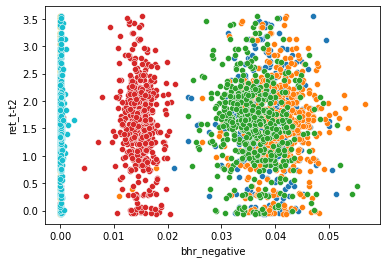

In [106]:
for col in df.filter(regex='^.*_(posi|nega)tive$', axis=1).columns:
    sns.scatterplot(data=df, x=col, y='ret_t-t2')
    print(col)

In [297]:
df.filter(regex='^.*_(posi|nega)tive$', axis=1).quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,ecom_negative,ecom_positive,bio_negative,bio_positive
0.01,0.025482,0.026364,0.025790,0.009579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.05,0.031528,0.032880,0.028943,0.011398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.25,0.035457,0.036979,0.033086,0.013601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000017
0.50,0.038217,0.039824,0.035853,0.014822,0.000017,0.000015,0.000000,0.000000,0.000000,0.000047
0.75,0.040611,0.043145,0.038983,0.016067,0.000042,0.000032,0.000000,0.000023,0.000017,0.000107
0.90,0.042825,0.046023,0.041833,0.017297,0.000078,0.000054,0.000013,0.000045,0.000044,0.000221
0.95,0.044350,0.047381,0.043495,0.018019,0.000114,0.000074,0.000020,0.000065,0.000083,0.000327
0.99,0.047664,0.051228,0.048285,0.019940,0.000223,0.000110,0.000039,0.000134,0.000321,0.000901


,Symbol,ret_t-t2,ret_t3-t10,sentiment,score
0,MMM,-0.017671,-0.090256,bhr_negative,0.044313
1,AOS,-0.014543,-0.138970,bhr_negative,0.032918
2,ABT,-0.041758,-0.127147,bhr_negative,0.039488
3,ABBV,-0.029927,-0.111148,bhr_negative,0.035181
4,ACN,-0.026583,-0.015658,bhr_negative,0.034122
...,...,...,...,...,...
5025,BF.B,NaN,NaN,bio_positive,0.000204
5026,FRC,NaN,NaN,bio_positive,NaN
5027,GEHC,NaN,NaN,bio_positive,NaN
5028,SBNY,NaN,NaN,bio_positive,NaN


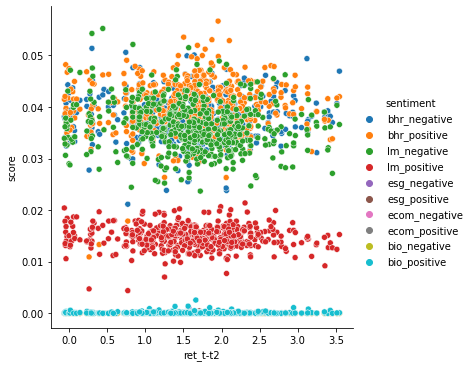

In [102]:
df_longer = df.filter(regex='^.*_(posi|nega)tive$|^ret_t.*$|^Symbol$', axis=1) \
        .melt(id_vars=['Symbol', 'ret_t-t2', 'ret_t3-t10'], var_name='sentiment', value_name='score') #\
        #.sort_values(by=['Symbol'], axis=1)
        # .melt(id_vars=['Symbol','word_count','unique_word_count'], var_name='sentiment', value_name='score')

# df_longer.sort_values(by='Symbol', axis=0)
# sns.scatterplot(df_longer)
sns.relplot(x=df_longer['ret_t-t2'], y=df_longer['score'], hue=df_longer['sentiment'])
df_longer

In [135]:
df_sent_rets = df.filter(regex='^Symbol$|^.*_(posi|nega)tive$|^ret_t.*$', axis=1)
df_sent_rets

,Symbol,ret_t-t2,ret_t3-t10,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,ecom_negative,ecom_positive,bio_negative,bio_positive
0,MMM,-0.017671,-0.090256,0.044313,0.041749,0.043097,0.015124,0.000000,0.000013,0.000000,0.000000,0.000052,0.000118
1,AOS,-0.014543,-0.138970,0.032918,0.038390,0.034101,0.013161,0.000030,0.000000,0.000000,0.000000,0.000000,0.000089
2,ABT,-0.041758,-0.127147,0.039488,0.039757,0.036242,0.010583,0.000019,0.000000,0.000000,0.000038,0.000115,0.000365
3,ABBV,-0.029927,-0.111148,0.035181,0.034953,0.035814,0.014764,0.000016,0.000016,0.000000,0.000016,0.000065,0.000276
4,ACN,-0.026583,-0.015658,0.034122,0.046747,0.036431,0.018437,0.000000,0.000058,0.000019,0.000038,0.000000,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,BF.B,NaN,NaN,0.036897,0.044091,0.033526,0.017170,0.000023,0.000023,0.000023,0.000000,0.000068,0.000204
499,FRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,GEHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
pd.wide_to_long(df_sent_rets, stubnames='return', i=['Symbol'], j='age')

KeyError: "None of [Index(['Symbol'], dtype='object')] are in the [columns]"

In [144]:
# pd.wide_to_long(df_sent_rets, stubnames=['a', 'b', 'c', 'd'], i='Symbol', j='huh', sep='_')\
#   .reset_index() #\
#   # .drop('dropme', axis=1)\
#   # .sort_values('id')
df_sent_rets

,Symbol,ret_t-t2,ret_t3-t10,bhr_negative,bhr_positive,lm_negative,lm_positive,esg_negative,esg_positive,ecom_negative,ecom_positive,bio_negative,bio_positive
0,MMM,-0.017671,-0.090256,0.044313,0.041749,0.043097,0.015124,0.000000,0.000013,0.000000,0.000000,0.000052,0.000118
1,AOS,-0.014543,-0.138970,0.032918,0.038390,0.034101,0.013161,0.000030,0.000000,0.000000,0.000000,0.000000,0.000089
2,ABT,-0.041758,-0.127147,0.039488,0.039757,0.036242,0.010583,0.000019,0.000000,0.000000,0.000038,0.000115,0.000365
3,ABBV,-0.029927,-0.111148,0.035181,0.034953,0.035814,0.014764,0.000016,0.000016,0.000000,0.000016,0.000065,0.000276
4,ACN,-0.026583,-0.015658,0.034122,0.046747,0.036431,0.018437,0.000000,0.000058,0.000019,0.000038,0.000000,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,BF.B,NaN,NaN,0.036897,0.044091,0.033526,0.017170,0.000023,0.000023,0.000023,0.000000,0.000068,0.000204
499,FRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,GEHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
# Prepend sentiments by sent-
# prepend returns by ret-
df_sent_rets = df.filter(regex='^Symbol$|^.*_(posi|nega)tive$|^ret_t.*$', axis=1)
df_sent_rets = df_sent_rets.rename(columns=lambda x: re.sub('^(.*_(posi|nega)tive)$',r'score+\1',x))
# df_sent_rets = df_sent_rets.rename(columns=lambda x: re.sub('^(ret_.*)$',r'ret+\1',x))
df_sent_rets

,Symbol,ret_t-t2,ret_t3-t10,score+bhr_negative,score+bhr_positive,score+lm_negative,score+lm_positive,score+esg_negative,score+esg_positive,score+ecom_negative,score+ecom_positive,score+bio_negative,score+bio_positive
0,MMM,-0.017671,-0.090256,0.044313,0.041749,0.043097,0.015124,0.000000,0.000013,0.000000,0.000000,0.000052,0.000118
1,AOS,-0.014543,-0.138970,0.032918,0.038390,0.034101,0.013161,0.000030,0.000000,0.000000,0.000000,0.000000,0.000089
2,ABT,-0.041758,-0.127147,0.039488,0.039757,0.036242,0.010583,0.000019,0.000000,0.000000,0.000038,0.000115,0.000365
3,ABBV,-0.029927,-0.111148,0.035181,0.034953,0.035814,0.014764,0.000016,0.000016,0.000000,0.000016,0.000065,0.000276
4,ACN,-0.026583,-0.015658,0.034122,0.046747,0.036431,0.018437,0.000000,0.000058,0.000019,0.000038,0.000000,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,BF.B,NaN,NaN,0.036897,0.044091,0.033526,0.017170,0.000023,0.000023,0.000023,0.000000,0.000068,0.000204
499,FRC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,GEHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,SBNY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
# pd.wide_to_long(df_sent_rets, stubnames=['ret','sent'], i='Symbol', j='type', sep='+', suffix='.+')
# # pd.wide_to_long(df_sent_rets, stubnames=['sentiment','return'], i='Symbol', j='new', sep='-')

In [241]:
# stubnames=['score','ret']
df_sent_rets_longer = pd.wide_to_long(df_sent_rets, stubnames=['score'], i='Symbol', j='sentiment', sep='+', suffix='.+').reset_index()
df_sent_rets_longer

,Symbol,sentiment,ret_t-t2,ret_t3-t10,score
0,MMM,bhr_negative,-0.017671,-0.090256,0.044313
1,AOS,bhr_negative,-0.014543,-0.138970,0.032918
2,ABT,bhr_negative,-0.041758,-0.127147,0.039488
3,ABBV,bhr_negative,-0.029927,-0.111148,0.035181
4,ACN,bhr_negative,-0.026583,-0.015658,0.034122
...,...,...,...,...,...
5025,BF.B,bio_positive,NaN,NaN,0.000204
5026,FRC,bio_positive,NaN,NaN,NaN
5027,GEHC,bio_positive,NaN,NaN,NaN
5028,SBNY,bio_positive,NaN,NaN,NaN


In [255]:
df_sent_rets_longer2 = df_sent_rets_longer.melt(id_vars=['Symbol', 'sentiment','score'], value_vars=['ret_t-t2', 'ret_t3-t10'],var_name='return type', value_name='return')
df_sent_rets_longer2

,Symbol,sentiment,score,return type,return
0,MMM,bhr_negative,0.044313,ret_t-t2,-0.017671
1,AOS,bhr_negative,0.032918,ret_t-t2,-0.014543
2,ABT,bhr_negative,0.039488,ret_t-t2,-0.041758
3,ABBV,bhr_negative,0.035181,ret_t-t2,-0.029927
4,ACN,bhr_negative,0.034122,ret_t-t2,-0.026583
...,...,...,...,...,...
10055,BF.B,bio_positive,0.000204,ret_t3-t10,NaN
10056,FRC,bio_positive,NaN,ret_t3-t10,NaN
10057,GEHC,bio_positive,NaN,ret_t3-t10,NaN
10058,SBNY,bio_positive,NaN,ret_t3-t10,NaN


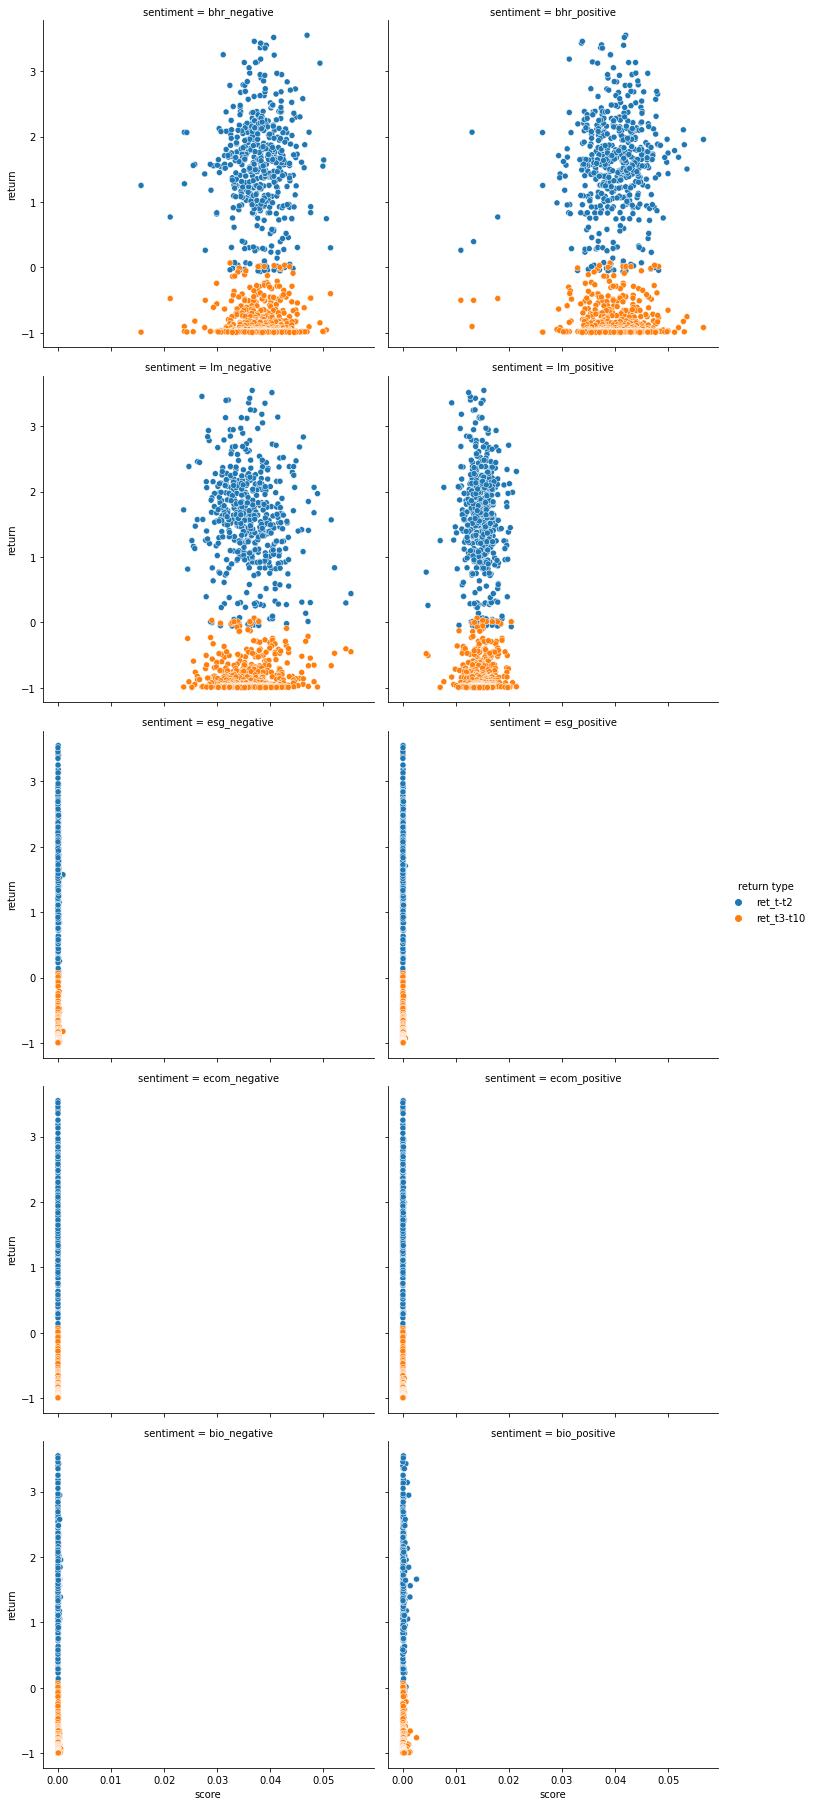

In [290]:
# almost there, let x axis adjust
sns.relplot(data=df_sent_rets_longer2, x='score', y='return', hue='return type', col_wrap=2, col='sentiment')
# plt.xscale('function', functions=(lambda x: np.log(x + 1), lambda x: np.exp(x) - 1))
plt.show()

<AxesSubplot:xlabel='score', ylabel='return'>

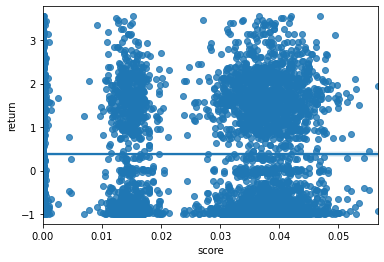

In [291]:
sns.regplot(data=df_sent_rets_longer2, x='score', y='return')

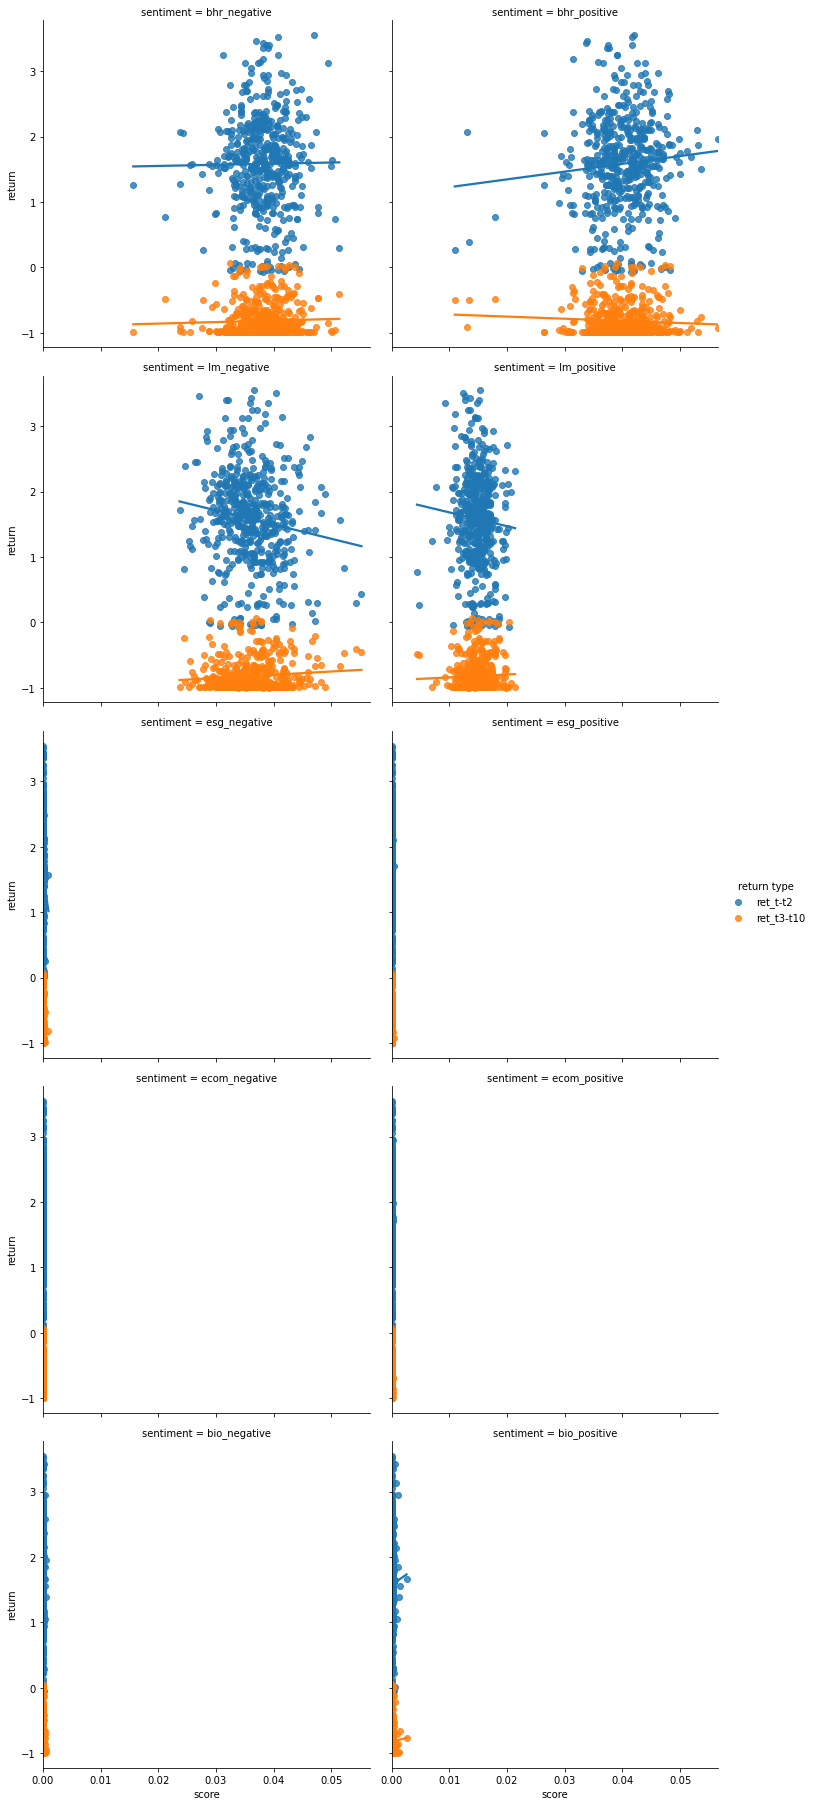

In [295]:
sns.lmplot(data=df_sent_rets_longer2, x='score', y='return', hue='return type', col_wrap=2, col='sentiment', ci=None)

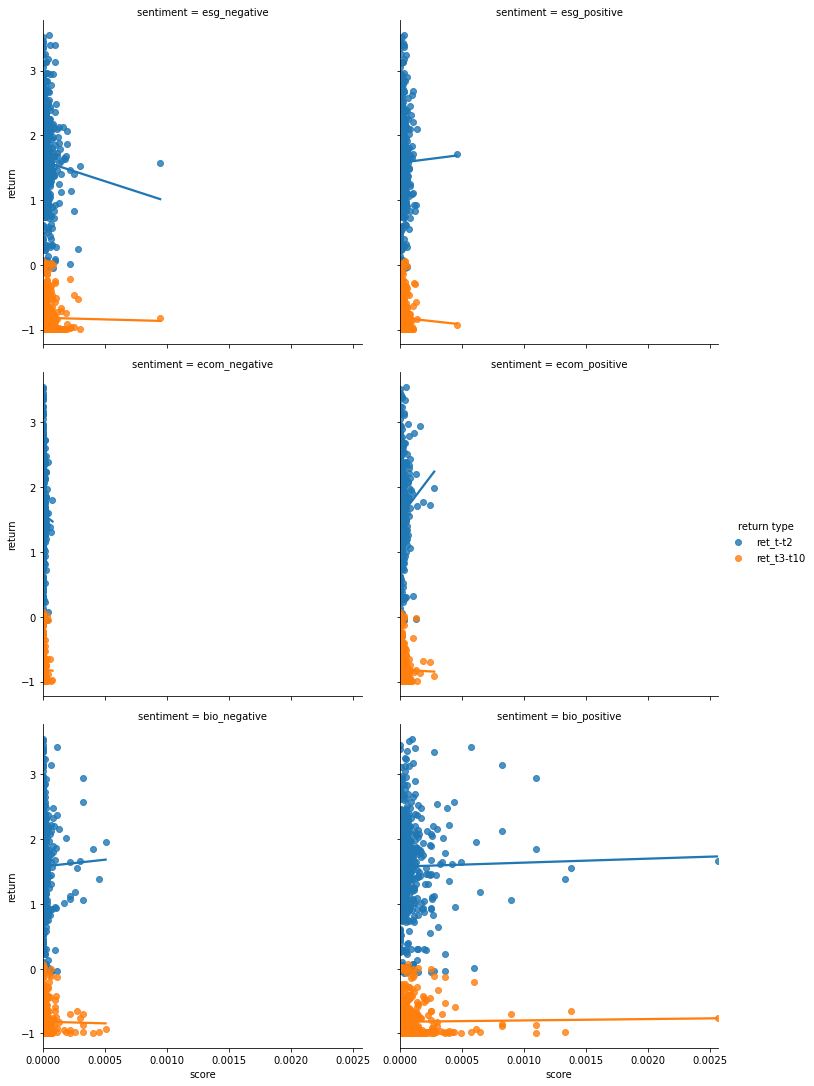

In [303]:
sns.lmplot(
        data=df_sent_rets_longer2.query('~sentiment.isin(["bhr_positive","bhr_negative","lm_positive","lm_negative"])'),
        x='score',
        y='return',
        hue='return type',
        col_wrap=2,
        col='sentiment',
        ci=None)

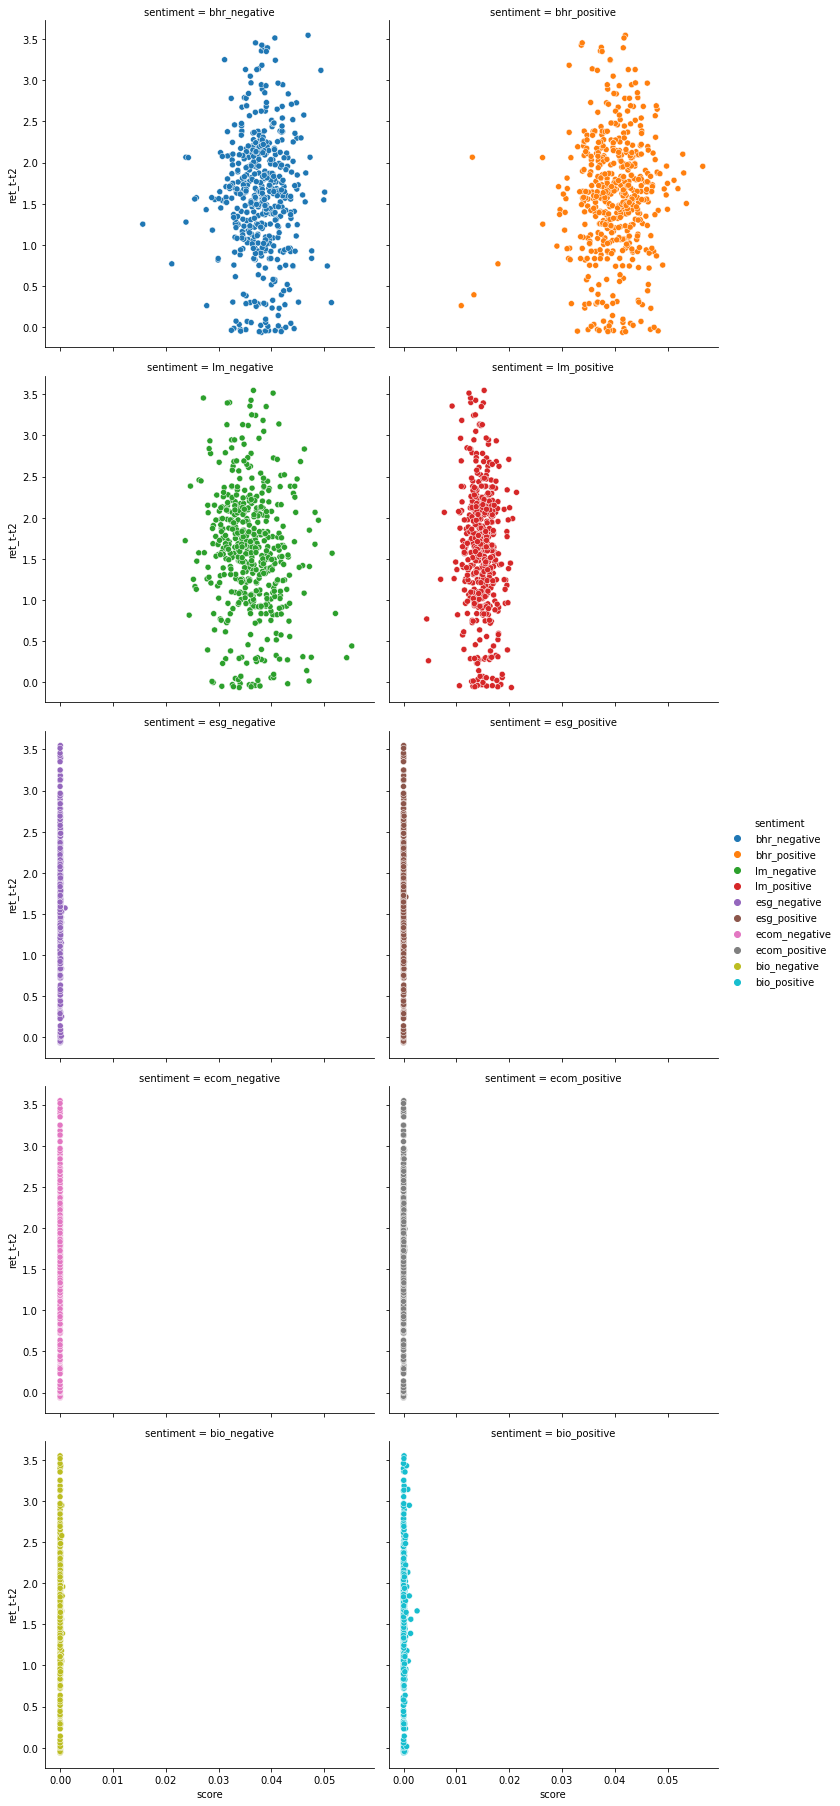

In [249]:
sns.relplot(data=df_sent_rets_longer, x='score', y='ret_t-t2', col='sentiment', hue='sentiment', col_wrap=2)
# sns.relplot(data=df_sent_rets_longer, x='score', y='ret_t3-t10', hue='sentiment')

In [ ]:
pd.wide_to_long(df, ['A(weekly)', 'B(weekly)'], i='id',
                j='year', sep='-')

In [177]:
pd.wide_to_long(df_sent)

Index(['Symbol', 'return+ret_t-t2', 'return+ret_t3-t10',
       'sentiment+bhr_negative', 'sentiment+bhr_positive',
       'sentiment+lm_negative', 'sentiment+lm_positive',
       'sentiment+esg_negative', 'sentiment+esg_positive',
       'sentiment+ecom_negative', 'sentiment+ecom_positive',
       'sentiment+bio_negative', 'sentiment+bio_positive'],
      dtype='object')

In [227]:
tdf = pd.DataFrame({'A(weekly)-2010': [0,1,2],
                   'A(weekly)-2011': [3,4,5],
                   'B(weekly)-2010': [6,7,8],
                   'B(weekly)-2011': [9,0,1],
                   'X' : [2,3,4]})
tdf['id'] = tdf.index
tdf

,A(weekly)-2010,A(weekly)-2011,B(weekly)-2010,B(weekly)-2011,X,id
0,0,3,6,9,2,0
1,1,4,7,0,3,1
2,2,5,8,1,4,2


In [228]:
pd.wide_to_long(tdf, ['A(weekly)', 'B(weekly)'], i='id',
                j='year', sep='-')

,,X,A(weekly),B(weekly)
id,year,,,
0,2010,2,0,6
1,2010,3,1,7
2,2010,4,2,8
0,2011,2,3,9
1,2011,3,4,0
2,2011,4,5,1
